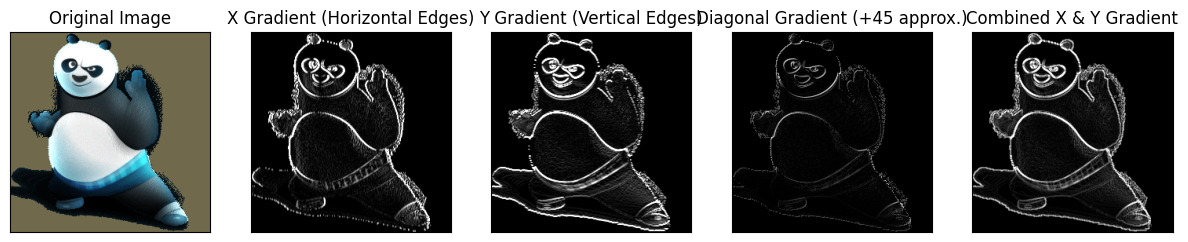

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_sobel_gradient(image_path):
    try:
        img = cv2.imread(image_path, cv2.IMREAD_COLOR)
        if img is None:
            print(f"Error: Could not open or find the image at {image_path}")
            return
        
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    except Exception as e:
        print(f"An error occurred during image loading: {e}")
        return

    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    abs_sobelx = cv2.convertScaleAbs(sobelx)

    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    abs_sobely = cv2.convertScaleAbs(sobely)

    kernel_diag = np.array([
        [-1, 0, 0],
        [0, 1, 0],
        [0, 0, 0]
    ], dtype=np.float32)
    diag_grad = cv2.filter2D(gray, cv2.CV_64F, kernel_diag)
    abs_diag_grad = cv2.convertScaleAbs(diag_grad)

    combined_grad = cv2.addWeighted(abs_sobelx, 0.5, abs_sobely, 0.5, 0)
    
    titles = [
        'Original Image', 'X Gradient (Horizontal Edges)', 
        'Y Gradient (Vertical Edges)', 'Diagonal Gradient (+45 approx.)', 
        'Combined X & Y Gradient'
    ]
    images = [img, abs_sobelx, abs_sobely, abs_diag_grad, combined_grad]

    plt.figure(figsize=(15, 8))
    for i in range(5):
        plt.subplot(1, 5, i + 1), plt.imshow(images[i], cmap='gray' if i > 0 else None)
        plt.title(titles[i])
        plt.xticks([]), plt.yticks([])
    
    plt.show()

image_file_path = 'panda.png'
apply_sobel_gradient(image_file_path)